#set z    = <   0.05  0.15  0.25  0.35  0.45  0.55  0.75>
#set m500 = <  2.402 3.831 5.028 5.577 6.206 6.257 6.473 >

set z    = < .01 .025 0.05  0.1 0.15  0.2  0.3  0.4  0.5  0.6  0.7 0.8   0.9   1.0 >
set yval = < 4.0 3.30 2.75 2.16 1.78 1.54 1.20 1.00 0.87 0.78 0.73 0.714 0.69 0.684> 

print {z yval}

set m500 = 10*10**(-yval/3.34)

set zsp = 0,1.0,0.01

spline z m500 zsp msp


########## Page 3
#print {zsp msp}

#
#  Now plot L_X
#

erase
expand 1.25

location 7500 29000 5000 16000

#
# Vikhlinin
#
define h (0.7)                                                                                                                                                       
define omegam (0.30)                                                                                                                                                 
define omegal (0.70)                                                                                                                                                 
set eofz = sqrt ( $omegam * (1+zsp)**3 + $omegal )                                                                                                                   
                                                                                                                                                                     
#                                                                                                                                                                    
#  m5c is M_500 critical and lnx is ln(L_X/1e40 erg/s)                                                                                                               
#     ln(1e44) = 92.1034037                                                                                                                                          
#                                                                                                                                                                    
set m5c = msp * 1e14

set lnx = 47.392 + 1.61 * ln(m5c) - 92.1034037 + 1.850*ln(eofz) - 0.39*ln($h/0.72) #-92 is for the single precision
set lx = exp(lnx)/1.e4

#print {zsp lnx lx m5c}

define _xl 0
define _xh 1
define _yl (lg(0.03))
define _yh (lg(10))

limits $_xl $_xh $_yl $_yh
ticksize 0 0 -1 0
box
xlabel redshift
ylabel L_X [10^{44} erg s^{-1}]

#set xp = t
#set yp = lg(m500)
#
#expand 2.5
#points xp yp

set xp = zsp
set yp = lg(lx)
connect xp yp

expand 1.25
location 7500 29000 20000 31000

define _xl (lg(0.01))
define _xh (lg(1))
define _yl (lg(0.03))
define _yh (lg(10))

limits $_xl $_xh $_yl $_yh
ticksize -1 0 -1 0
box
xlabel redshift
ylabel L_X [10^{44} erg s^{-1}]

#set xp = lg(z)
#set yp = lg(m500)
#
#expand 2.5
#points xp yp

set xp = lg(zsp)
set yp = lg(lx)
connect xp yp

location 3500 31000 3500 31000
expand 1.0


In [1]:
import os
import sys
sys.path.append(f'{os.environ["HOME"]}/Projects/planckClusters/catalogs')
import numpy as np
from load_catalogs import load_PSZcatalog, load_extraCatalogs
from astropy.table import Table

In [2]:
data = load_PSZcatalog(full=True)

In [6]:
data['MSZ_y']

0       3.962411
1       5.297053
2       6.333562
3            NaN
4       2.835297
          ...   
1938         NaN
1939         NaN
1940         NaN
1941         NaN
1942         NaN
Name: MSZ_y, Length: 1943, dtype: float64

In [7]:
h = 0.7                                                                       
z1 = 0                                                                        
z2 = 1.2                                                                      
dz = 0.025                                                                    

# build the mass array                                                        
zarr = np.arange(z1, z2 + dz, dz)                                          
mass = np.ones_like(zarr) * 1e14                                           

ps2 = Table.read(f'{os.environ["HOME"]}/Projects/planckClusters/catalogs/PSZ2v1.fits')                                   
df2 = ps2.to_pandas()                                                         
data = df2[['REDSHIFT', 'MSZ']]                                               
data['REDSHIFT'].replace(-1, np.nan, inplace=True)                         

# redshift bins                                                               
zbins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 3]                        

nMasses = 100                                                                 
big_mass = []                                                                 
for j in range(nMasses):                                                      
    mass = np.ones_like(zarr) * 1e14                                       
    for i in range(len(zbins) - 1):                                           
        mask = (zbins[i] <= zarr) & (zarr < zbins[i + 1])                     

        mass[mask] *= float(data.loc[(zbins[i] <= data['REDSHIFT']) &         
                        (data['REDSHIFT'] < zbins[i + 1]),                    
                            'MSZ'].sample()) * h                              
    big_mass.append(mass)                                                     

mass = np.vstack(big_mass)

/home/boada/.local/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
mass

array([[1.57667460e+14, 1.57667460e+14, 1.57667460e+14, ...,
        7.52751274e+14, 7.52751274e+14, 7.52751274e+14],
       [1.42194459e+14, 1.42194459e+14, 1.42194459e+14, ...,
        5.36468921e+14, 5.36468921e+14, 5.36468921e+14],
       [1.06634241e+14, 1.06634241e+14, 1.06634241e+14, ...,
        3.99037838e+14, 3.99037838e+14, 3.99037838e+14],
       ...,
       [2.56842678e+14, 2.56842678e+14, 2.56842678e+14, ...,
        3.99037838e+14, 3.99037838e+14, 3.99037838e+14],
       [1.73148472e+14, 1.73148472e+14, 1.73148472e+14, ...,
        3.99037838e+14, 3.99037838e+14, 3.99037838e+14],
       [1.16695703e+14, 1.16695703e+14, 1.16695703e+14, ...,
        5.20200124e+14, 5.20200124e+14, 5.20200124e+14]])

In [9]:
from matplotlib import pyplot as plt

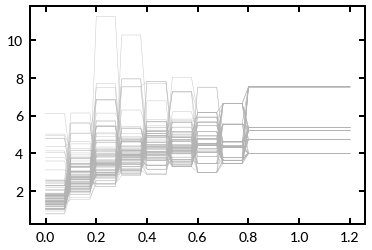

In [12]:
lws = [0.5, 1.5, 2.5]                                                      

# plot the masses at the bottom                                            
for i in range(nMasses):                                                   
    plt.plot(zarr, big_mass[i] / 1e14, c='0.7', lw=lws[0], alpha=0.7)         


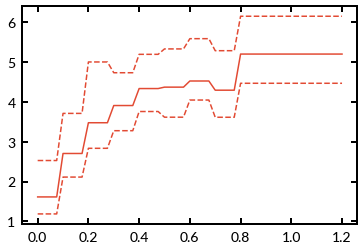

In [15]:
umasses = [np.unique(np.unique(mass, axis=0)[:, i])                  
                        for i in range(zarr.size)]                         

bounds = [np.percentile(umasses[i] / 1e14, [50 - 34.1, 50, 50 + 34.1])  
          for i in range(zarr.size)]                                       

# convert to array                                                         
bounds = np.array(bounds)                                               

plt.plot(zarr, bounds[:, 0], ls='--', lw=lws[1], color='#e24a33')             
plt.plot(zarr, bounds[:, 1], lw=lws[1], color='#e24a33')                                                                                                            
plt.plot(zarr, bounds[:, 2], ls='--', lw=lws[1], color='#e24a33')

In [16]:
bounds[:,1]

array([1.61327082, 1.61327082, 1.61327082, 1.61327082, 2.70460237,
       2.70460237, 2.70460237, 2.70460237, 3.47685895, 3.47685895,
       3.47685895, 3.47685895, 3.9090651 , 3.9090651 , 3.9090651 ,
       3.9090651 , 4.33553214, 4.33553214, 4.33553214, 4.33553214,
       4.37105949, 4.37105949, 4.37105949, 4.37105949, 4.52531686,
       4.52531686, 4.52531686, 4.52531686, 4.29439635, 4.29439635,
       4.29439635, 4.29439635, 5.20200124, 5.20200124, 5.20200124,
       5.20200124, 5.20200124, 5.20200124, 5.20200124, 5.20200124,
       5.20200124, 5.20200124, 5.20200124, 5.20200124, 5.20200124,
       5.20200124, 5.20200124, 5.20200124, 5.20200124])

In [17]:
from astropy.cosmology import LambdaCDM

In [18]:
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7, Tcmb0=2.725)
h = cosmo.H0.value/100

In [20]:
cosmo.efunc(zarr)

array([1.        , 1.01147008, 1.02337536, 1.03571444, 1.04848541,
       1.06168597, 1.07531338, 1.08936454, 1.10383605, 1.11872415,
       1.13402488, 1.149734  , 1.16584708, 1.18235952, 1.19926656,
       1.21656334, 1.23424487, 1.25230611, 1.27074195, 1.28954725,
       1.30871684, 1.32824556, 1.34812824, 1.36835976, 1.38893501,
       1.40984893, 1.43109653, 1.45267286, 1.47457304, 1.49679227,
       1.51932583, 1.54216907, 1.56531745, 1.58876648, 1.6125118 ,
       1.63654912, 1.66087424, 1.68548306, 1.71037159, 1.7355359 ,
       1.76097218, 1.78667669, 1.81264581, 1.83887599, 1.86536377,
       1.89210579, 1.91909875, 1.94633947, 1.97382482])

In [31]:
m5c = bounds[:,1] * 1e14

m5c = 5e14
lnx = 47.392 + 1.61 * np.log(m5c) + 1.850*np.log(cosmo.efunc(zarr)) - 0.39*np.log(h/0.72)
lx = np.exp(lnx)


(0.1, 10)

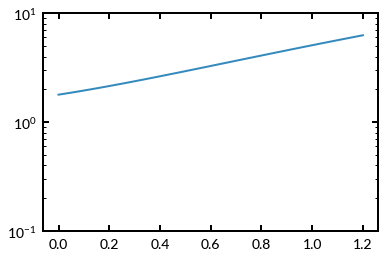

In [32]:
plt.plot(zarr, lx/1e44)
plt.semilogy()
plt.ylim(0.1,10)